<a href="https://colab.research.google.com/github/seenu-g/school_of_ai/blob/master/Final.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
# mount gdrive and unzip data
from google.colab import drive
drive.mount('/content/gdrive',force_remount=True)

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/gdrive


In [2]:
import sys
import os
folder = '/content/gdrive/My Drive/school_of_ai/chap7/'
os.chdir(folder)
print(os.getcwd()) 
for root, dirs, files in os.walk("."):
    for filename in files:
        print(filename)
sys.path.append(folder)

/content/gdrive/My Drive/school_of_ai/chap7
evaluate.py
model.py
load_data.py
train_test.py
show_images.py
Final.ipynb


In [0]:
%matplotlib inline
import torch
import load_data
import show_images
import model
import train_test
import evaluate

In [5]:
classes, trainloader, testloader = load_data.load()


Extracting ./data/cifar-10-python.tar.gz to ./data
Files already downloaded and verified
CUDA Available? True


shape: torch.Size([128, 3, 32, 32])


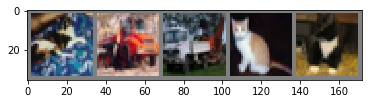

In [6]:
show_images.show_random_images(trainloader, classes)

In [24]:
import model
!pip install torchsummary
from torchsummary import summary
use_cuda = torch.cuda.is_available()
device = torch.device("cuda" if use_cuda else "cpu")
print(device)
my_model = model.Net().to(device)
summary(my_model, input_size=(3, 32, 32))

cuda
----------------------------------------------------------------
        Layer (type)               Output Shape         Param #
            Conv2d-1           [-1, 16, 30, 30]             432
              ReLU-2           [-1, 16, 30, 30]               0
       BatchNorm2d-3           [-1, 16, 30, 30]              32
           Dropout-4           [-1, 16, 30, 30]               0
            Conv2d-5           [-1, 32, 30, 30]           4,608
              ReLU-6           [-1, 32, 30, 30]               0
       BatchNorm2d-7           [-1, 32, 30, 30]              64
           Dropout-8           [-1, 32, 30, 30]               0
            Conv2d-9           [-1, 64, 30, 30]          18,432
             ReLU-10           [-1, 64, 30, 30]               0
      BatchNorm2d-11           [-1, 64, 30, 30]             128
          Dropout-12           [-1, 64, 30, 30]               0
           Conv2d-13          [-1, 128, 30, 30]          73,728
             ReLU-14          [-1,

In [0]:
import torch.nn as nn
import torch.optim as optim
from torch.optim.lr_scheduler import StepLR

criterion = nn.CrossEntropyLoss()
optimizer = optim.SGD(my_model.parameters(), lr=0.1, momentum=0.9)

In [34]:
EPOCHS = 50
for epoch in range(EPOCHS):
    print("EPOCH:", epoch+1)
    train_test.train(my_model, device, trainloader, optimizer, criterion, epoch)
    train_test.test(my_model, device, criterion, testloader)

  0%|          | 0/391 [00:00<?, ?it/s]

EPOCH: 1


Loss=1.1704617738723755 Batch_id=390 Accuracy=62.54: 100%|██████████| 391/391 [00:28<00:00, 14.76it/s]
  0%|          | 0/391 [00:00<?, ?it/s]


Test set: Average loss: 0.0160, Accuracy: 3728/10000 (37.28%)

EPOCH: 2


Loss=0.8580783605575562 Batch_id=390 Accuracy=65.79: 100%|██████████| 391/391 [00:28<00:00, 14.50it/s]
  0%|          | 0/391 [00:00<?, ?it/s]


Test set: Average loss: 0.0105, Accuracy: 5340/10000 (53.40%)

EPOCH: 3


Loss=0.8874930143356323 Batch_id=390 Accuracy=68.71: 100%|██████████| 391/391 [00:28<00:00, 14.40it/s]
  0%|          | 0/391 [00:00<?, ?it/s]


Test set: Average loss: 0.0122, Accuracy: 4779/10000 (47.79%)

EPOCH: 4


Loss=0.7949024438858032 Batch_id=390 Accuracy=71.12: 100%|██████████| 391/391 [00:28<00:00, 14.41it/s]
  0%|          | 0/391 [00:00<?, ?it/s]


Test set: Average loss: 0.0095, Accuracy: 5951/10000 (59.51%)

EPOCH: 5


Loss=0.7866171598434448 Batch_id=390 Accuracy=72.98: 100%|██████████| 391/391 [00:29<00:00, 14.36it/s]
  0%|          | 0/391 [00:00<?, ?it/s]


Test set: Average loss: 0.0103, Accuracy: 5666/10000 (56.66%)

EPOCH: 6


Loss=0.7228531837463379 Batch_id=390 Accuracy=74.41: 100%|██████████| 391/391 [00:29<00:00, 14.05it/s]
  0%|          | 0/391 [00:00<?, ?it/s]


Test set: Average loss: 0.0097, Accuracy: 5885/10000 (58.85%)

EPOCH: 7


Loss=0.7511176466941833 Batch_id=390 Accuracy=76.00: 100%|██████████| 391/391 [00:29<00:00, 14.09it/s]
  0%|          | 0/391 [00:00<?, ?it/s]


Test set: Average loss: 0.0096, Accuracy: 5963/10000 (59.63%)

EPOCH: 8


Loss=0.4336184859275818 Batch_id=390 Accuracy=77.23: 100%|██████████| 391/391 [00:29<00:00, 14.04it/s]
  0%|          | 0/391 [00:00<?, ?it/s]


Test set: Average loss: 0.0090, Accuracy: 6228/10000 (62.28%)

EPOCH: 9


Loss=0.6723741888999939 Batch_id=390 Accuracy=78.49: 100%|██████████| 391/391 [00:29<00:00, 14.17it/s]
  0%|          | 0/391 [00:00<?, ?it/s]


Test set: Average loss: 0.0086, Accuracy: 6390/10000 (63.90%)

EPOCH: 10


Loss=0.6246336698532104 Batch_id=390 Accuracy=79.21: 100%|██████████| 391/391 [00:29<00:00, 14.05it/s]
  0%|          | 0/391 [00:00<?, ?it/s]


Test set: Average loss: 0.0069, Accuracy: 6918/10000 (69.18%)

EPOCH: 11


Loss=0.647334098815918 Batch_id=390 Accuracy=79.91: 100%|██████████| 391/391 [00:29<00:00, 14.07it/s]
  0%|          | 0/391 [00:00<?, ?it/s]


Test set: Average loss: 0.0071, Accuracy: 6986/10000 (69.86%)

EPOCH: 12


Loss=0.5445614457130432 Batch_id=390 Accuracy=80.95: 100%|██████████| 391/391 [00:29<00:00, 14.02it/s]
  0%|          | 0/391 [00:00<?, ?it/s]


Test set: Average loss: 0.0072, Accuracy: 6817/10000 (68.17%)

EPOCH: 13


Loss=0.3363100588321686 Batch_id=390 Accuracy=81.85: 100%|██████████| 391/391 [00:29<00:00, 14.00it/s]
  0%|          | 0/391 [00:00<?, ?it/s]


Test set: Average loss: 0.0080, Accuracy: 6675/10000 (66.75%)

EPOCH: 14


Loss=0.42694729566574097 Batch_id=390 Accuracy=82.35: 100%|██████████| 391/391 [00:29<00:00, 14.05it/s]
  0%|          | 0/391 [00:00<?, ?it/s]


Test set: Average loss: 0.0071, Accuracy: 6889/10000 (68.89%)

EPOCH: 15


Loss=0.41923466324806213 Batch_id=390 Accuracy=82.81: 100%|██████████| 391/391 [00:29<00:00, 14.13it/s]
  0%|          | 0/391 [00:00<?, ?it/s]


Test set: Average loss: 0.0070, Accuracy: 6968/10000 (69.68%)

EPOCH: 16


Loss=0.7105323076248169 Batch_id=390 Accuracy=83.44: 100%|██████████| 391/391 [00:29<00:00, 13.96it/s]
  0%|          | 0/391 [00:00<?, ?it/s]


Test set: Average loss: 0.0062, Accuracy: 7312/10000 (73.12%)

EPOCH: 17


Loss=0.5272663831710815 Batch_id=390 Accuracy=83.89: 100%|██████████| 391/391 [00:29<00:00, 14.09it/s]
  0%|          | 0/391 [00:00<?, ?it/s]


Test set: Average loss: 0.0074, Accuracy: 6911/10000 (69.11%)

EPOCH: 18


Loss=0.4100606441497803 Batch_id=390 Accuracy=84.55: 100%|██████████| 391/391 [00:29<00:00, 13.96it/s]
  0%|          | 0/391 [00:00<?, ?it/s]


Test set: Average loss: 0.0058, Accuracy: 7485/10000 (74.85%)

EPOCH: 19


Loss=0.410559743642807 Batch_id=390 Accuracy=85.11: 100%|██████████| 391/391 [00:29<00:00, 14.09it/s]
  0%|          | 0/391 [00:00<?, ?it/s]


Test set: Average loss: 0.0063, Accuracy: 7292/10000 (72.92%)

EPOCH: 20


Loss=0.3443106412887573 Batch_id=390 Accuracy=85.35: 100%|██████████| 391/391 [00:29<00:00, 13.95it/s]
  0%|          | 0/391 [00:00<?, ?it/s]


Test set: Average loss: 0.0056, Accuracy: 7665/10000 (76.65%)

EPOCH: 21


Loss=0.3808744549751282 Batch_id=390 Accuracy=85.94: 100%|██████████| 391/391 [00:29<00:00, 13.07it/s]
  0%|          | 0/391 [00:00<?, ?it/s]


Test set: Average loss: 0.0052, Accuracy: 7755/10000 (77.55%)

EPOCH: 22


Loss=0.5304169654846191 Batch_id=390 Accuracy=86.05: 100%|██████████| 391/391 [00:29<00:00, 13.96it/s]
  0%|          | 0/391 [00:00<?, ?it/s]


Test set: Average loss: 0.0056, Accuracy: 7652/10000 (76.52%)

EPOCH: 23


Loss=0.3875771760940552 Batch_id=390 Accuracy=86.70: 100%|██████████| 391/391 [00:29<00:00, 14.16it/s]
  0%|          | 0/391 [00:00<?, ?it/s]


Test set: Average loss: 0.0054, Accuracy: 7714/10000 (77.14%)

EPOCH: 24


Loss=0.38708069920539856 Batch_id=390 Accuracy=87.00: 100%|██████████| 391/391 [00:29<00:00, 13.96it/s]
  0%|          | 0/391 [00:00<?, ?it/s]


Test set: Average loss: 0.0064, Accuracy: 7170/10000 (71.70%)

EPOCH: 25


Loss=0.29591822624206543 Batch_id=390 Accuracy=87.46: 100%|██████████| 391/391 [00:29<00:00, 14.02it/s]
  0%|          | 0/391 [00:00<?, ?it/s]


Test set: Average loss: 0.0047, Accuracy: 8011/10000 (80.11%)

EPOCH: 26


Loss=0.46043309569358826 Batch_id=390 Accuracy=87.70: 100%|██████████| 391/391 [00:29<00:00, 13.96it/s]
  0%|          | 0/391 [00:00<?, ?it/s]


Test set: Average loss: 0.0056, Accuracy: 7651/10000 (76.51%)

EPOCH: 27


Loss=0.41959190368652344 Batch_id=390 Accuracy=87.79: 100%|██████████| 391/391 [00:29<00:00, 14.06it/s]
  0%|          | 0/391 [00:00<?, ?it/s]


Test set: Average loss: 0.0047, Accuracy: 8035/10000 (80.35%)

EPOCH: 28


Loss=0.35994189977645874 Batch_id=390 Accuracy=88.38: 100%|██████████| 391/391 [00:29<00:00, 13.97it/s]
  0%|          | 0/391 [00:00<?, ?it/s]


Test set: Average loss: 0.0053, Accuracy: 7827/10000 (78.27%)

EPOCH: 29


Loss=0.4593057632446289 Batch_id=390 Accuracy=88.34: 100%|██████████| 391/391 [00:29<00:00, 14.04it/s]
  0%|          | 0/391 [00:00<?, ?it/s]


Test set: Average loss: 0.0050, Accuracy: 7872/10000 (78.72%)

EPOCH: 30


Loss=0.19406548142433167 Batch_id=390 Accuracy=88.71: 100%|██████████| 391/391 [00:29<00:00, 14.00it/s]
  0%|          | 0/391 [00:00<?, ?it/s]


Test set: Average loss: 0.0047, Accuracy: 7995/10000 (79.95%)

EPOCH: 31


Loss=0.46574586629867554 Batch_id=390 Accuracy=89.07: 100%|██████████| 391/391 [00:29<00:00, 14.00it/s]
  0%|          | 0/391 [00:00<?, ?it/s]


Test set: Average loss: 0.0052, Accuracy: 7711/10000 (77.11%)

EPOCH: 32


Loss=0.4255952835083008 Batch_id=390 Accuracy=89.35: 100%|██████████| 391/391 [00:29<00:00, 14.04it/s]
  0%|          | 0/391 [00:00<?, ?it/s]


Test set: Average loss: 0.0051, Accuracy: 7798/10000 (77.98%)

EPOCH: 33


Loss=0.34501412510871887 Batch_id=390 Accuracy=89.52: 100%|██████████| 391/391 [00:29<00:00, 13.98it/s]
  0%|          | 0/391 [00:00<?, ?it/s]


Test set: Average loss: 0.0049, Accuracy: 7944/10000 (79.44%)

EPOCH: 34


Loss=0.3419610261917114 Batch_id=390 Accuracy=90.00: 100%|██████████| 391/391 [00:29<00:00, 13.91it/s]
  0%|          | 0/391 [00:00<?, ?it/s]


Test set: Average loss: 0.0045, Accuracy: 8070/10000 (80.70%)

EPOCH: 35


Loss=0.44453534483909607 Batch_id=390 Accuracy=90.27: 100%|██████████| 391/391 [00:29<00:00, 14.04it/s]
  0%|          | 0/391 [00:00<?, ?it/s]


Test set: Average loss: 0.0047, Accuracy: 7997/10000 (79.97%)

EPOCH: 36


Loss=0.3368470072746277 Batch_id=390 Accuracy=90.28: 100%|██████████| 391/391 [00:29<00:00, 14.07it/s]
  0%|          | 0/391 [00:00<?, ?it/s]


Test set: Average loss: 0.0052, Accuracy: 7844/10000 (78.44%)

EPOCH: 37


Loss=0.3516775965690613 Batch_id=390 Accuracy=90.44: 100%|██████████| 391/391 [00:29<00:00, 14.09it/s]
  0%|          | 0/391 [00:00<?, ?it/s]


Test set: Average loss: 0.0050, Accuracy: 7857/10000 (78.57%)

EPOCH: 38


Loss=0.3001636266708374 Batch_id=390 Accuracy=90.65: 100%|██████████| 391/391 [00:29<00:00, 13.88it/s]
  0%|          | 0/391 [00:00<?, ?it/s]


Test set: Average loss: 0.0046, Accuracy: 8073/10000 (80.73%)

EPOCH: 39


Loss=0.4125271439552307 Batch_id=390 Accuracy=90.76: 100%|██████████| 391/391 [00:29<00:00, 13.87it/s]
  0%|          | 0/391 [00:00<?, ?it/s]


Test set: Average loss: 0.0058, Accuracy: 7584/10000 (75.84%)

EPOCH: 40


Loss=0.30555030703544617 Batch_id=390 Accuracy=90.91: 100%|██████████| 391/391 [00:29<00:00, 14.14it/s]
  0%|          | 0/391 [00:00<?, ?it/s]


Test set: Average loss: 0.0052, Accuracy: 7832/10000 (78.32%)

EPOCH: 41


Loss=0.19974061846733093 Batch_id=390 Accuracy=91.16: 100%|██████████| 391/391 [00:29<00:00, 14.13it/s]
  0%|          | 0/391 [00:00<?, ?it/s]


Test set: Average loss: 0.0051, Accuracy: 7871/10000 (78.71%)

EPOCH: 42


Loss=0.26912230253219604 Batch_id=390 Accuracy=91.19: 100%|██████████| 391/391 [00:29<00:00, 14.02it/s]
  0%|          | 0/391 [00:00<?, ?it/s]


Test set: Average loss: 0.0046, Accuracy: 8083/10000 (80.83%)

EPOCH: 43


Loss=0.31205254793167114 Batch_id=390 Accuracy=91.37: 100%|██████████| 391/391 [00:29<00:00, 13.88it/s]
  0%|          | 0/391 [00:00<?, ?it/s]


Test set: Average loss: 0.0041, Accuracy: 8304/10000 (83.04%)

EPOCH: 44


Loss=0.23170098662376404 Batch_id=390 Accuracy=91.50: 100%|██████████| 391/391 [00:29<00:00, 14.09it/s]
  0%|          | 0/391 [00:00<?, ?it/s]


Test set: Average loss: 0.0046, Accuracy: 8078/10000 (80.78%)

EPOCH: 45


Loss=0.19928818941116333 Batch_id=390 Accuracy=91.68: 100%|██████████| 391/391 [00:29<00:00, 14.09it/s]
  0%|          | 0/391 [00:00<?, ?it/s]


Test set: Average loss: 0.0053, Accuracy: 7825/10000 (78.25%)

EPOCH: 46


Loss=0.32125601172447205 Batch_id=390 Accuracy=91.92: 100%|██████████| 391/391 [00:29<00:00, 14.03it/s]
  0%|          | 0/391 [00:00<?, ?it/s]


Test set: Average loss: 0.0044, Accuracy: 8138/10000 (81.38%)

EPOCH: 47


Loss=0.3097709119319916 Batch_id=390 Accuracy=92.07: 100%|██████████| 391/391 [00:30<00:00, 14.08it/s]
  0%|          | 0/391 [00:00<?, ?it/s]


Test set: Average loss: 0.0055, Accuracy: 7738/10000 (77.38%)

EPOCH: 48


Loss=0.267173707485199 Batch_id=390 Accuracy=92.13: 100%|██████████| 391/391 [00:29<00:00, 14.11it/s]
  0%|          | 0/391 [00:00<?, ?it/s]


Test set: Average loss: 0.0045, Accuracy: 8156/10000 (81.56%)

EPOCH: 49


Loss=0.3300130367279053 Batch_id=390 Accuracy=92.24: 100%|██████████| 391/391 [00:29<00:00, 13.94it/s]
  0%|          | 0/391 [00:00<?, ?it/s]


Test set: Average loss: 0.0053, Accuracy: 7820/10000 (78.20%)

EPOCH: 50


Loss=0.18863080441951752 Batch_id=390 Accuracy=92.59: 100%|██████████| 391/391 [00:29<00:00, 13.11it/s]



Test set: Average loss: 0.0048, Accuracy: 8048/10000 (80.48%)



GroundTruth:    dog truck  deer  ship  deer
Predicted:    dog truck  deer  ship  deer


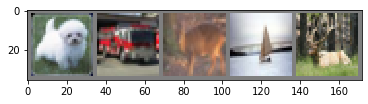

In [35]:
evaluate.show_predicted_actual(my_model, device, testloader, classes)

In [36]:
evaluate.evaluate_accuracy(my_model, device, testloader)

Accuracy of the network on the 10000 test images: 80 %


In [37]:
evaluate.evaluate_classwise_accuracy(my_model, device, classes, testloader)

Accuracy of plane : 83 %
Accuracy of   car : 91 %
Accuracy of  bird : 62 %
Accuracy of   cat : 93 %
Accuracy of  deer : 86 %
Accuracy of   dog : 60 %
Accuracy of  frog : 87 %
Accuracy of horse : 66 %
Accuracy of  ship : 92 %
Accuracy of truck : 97 %
